###Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.




Dataset:

CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India.
Guidelines:

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.


In [ ]:
#Import neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading Dataset
df=pd.read_csv('/content/Covid_19_Clean_Complete (2).csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
#Detailed Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.rename(columns={'Province/State':'State',
                   'Country/Region':'Country'}, inplace=True)

In [ ]:
#Description
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
df.isna().sum().sum() #Checking for null values

np.int64(34404)

In [ ]:
df.duplicated().sum() #Chaecking for duplicates

np.int64(0)

In [ ]:
df['Date'].value_counts() #Value counts for each date

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


In [ ]:
df['Country'].unique().shape #Dimension

(187,)

In [ ]:
df_total=df.groupby(['Country'])[['Confirmed','Deaths','Recovered','Active']].sum() #Total Active cases, Death cases, etc for each country

In [ ]:
df_total

,Confirmed,Deaths,Recovered,Active
Country,,,,
Afghanistan,1936390,49098,798240,1089052
Albania,196702,5708,118877,72117
Algeria,1179755,77972,755897,345886
Andorra,94404,5423,69074,19907
Angola,22662,1078,6573,15011
...,...,...,...,...
West Bank and Gaza,233461,1370,61124,170967
Western Sahara,901,63,648,190
Yemen,67180,17707,23779,25694


In [ ]:
df_confirmed=df.groupby(['Date'])['Confirmed'].sum().reset_index() #Confirmed cases for specific date
df_confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


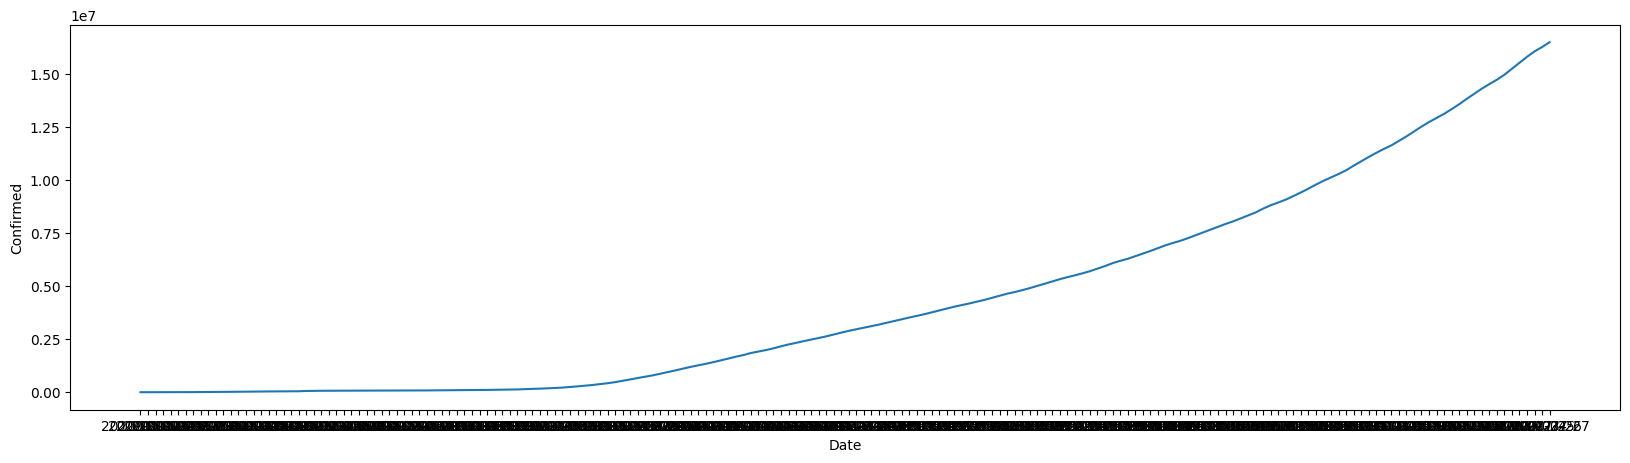

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_confirmed,x='Date',y='Confirmed')
plt.show()

In [ ]:
df_recovered=df.groupby(['Date'])['Recovered'].sum().reset_index() #Recovered cases for specific date
df_recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


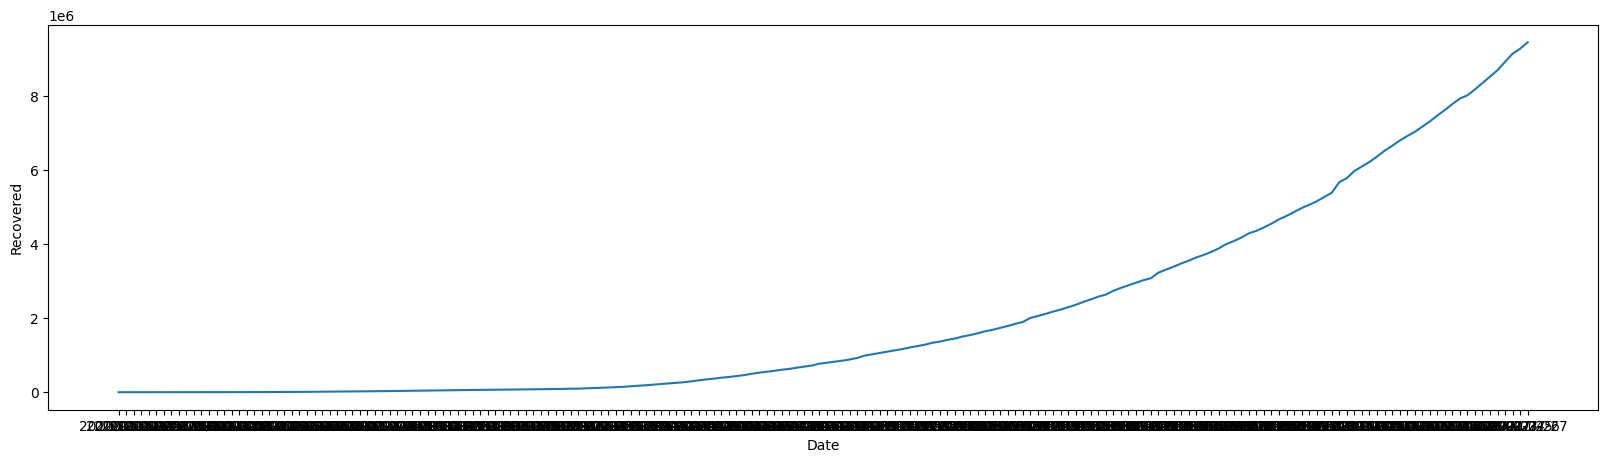

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_recovered,x='Date',y='Recovered')
plt.show()

In [ ]:
df_active=df.groupby(['Date'])['Active'].sum().reset_index() #Active cases for specific date
df_active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


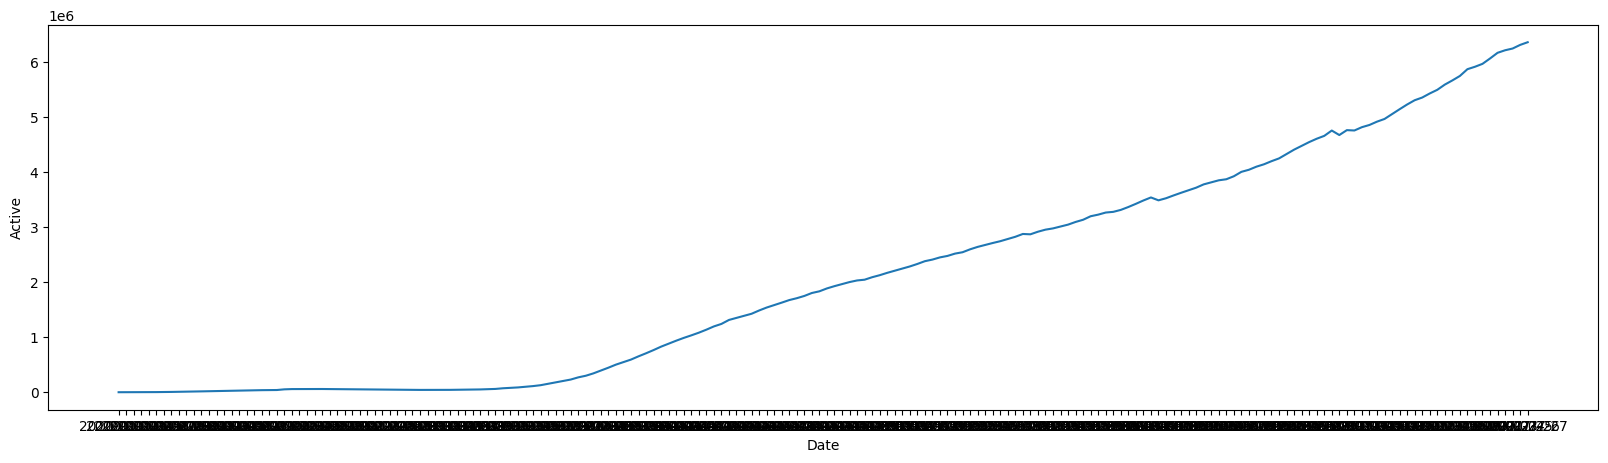

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_active,x='Date',y='Active')
plt.show()

In [ ]:
df_deaths=df.groupby(['Date'])['Deaths'].sum().reset_index() #Deaths froe specific dates
df_deaths

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


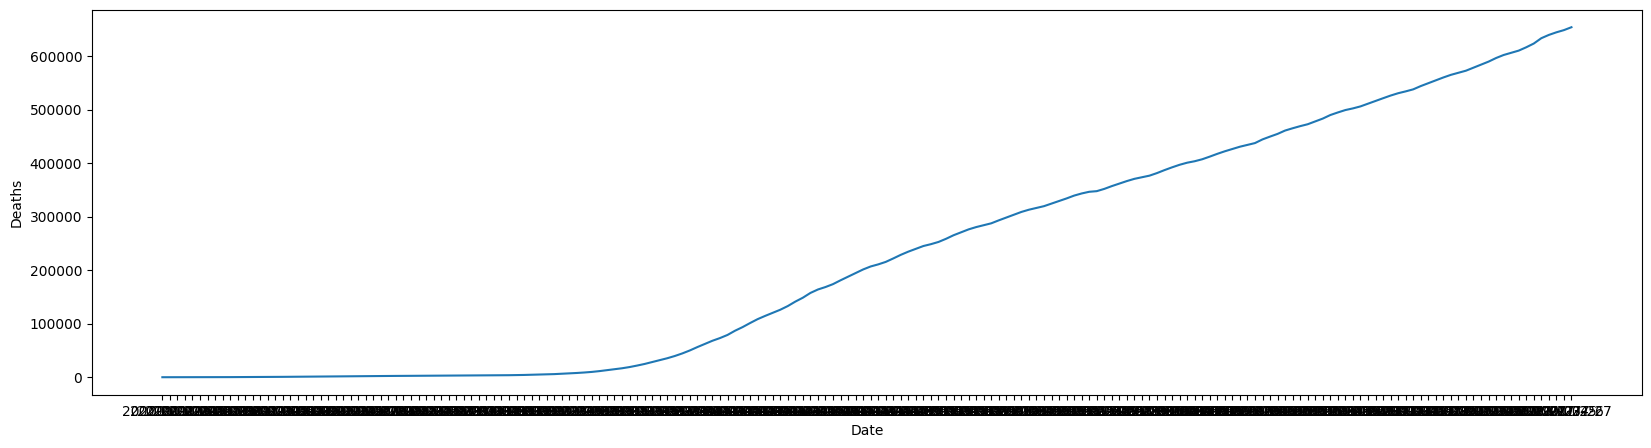

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_deaths,x='Date',y='Deaths')
plt.show()

In [ ]:
# Prophet is an open-source forecasting library developed by Facebook’s Core Data Science team.
# It’s designed to make time series forecasting easy and intuitive, even with complex seasonal patterns and missing data.
!pip install Prophet

In [ ]:
df.rename(columns={
    'Date':'ds',
    'Confirmed':'y'
}, inplace=True)

In [ ]:
from prophet import Prophet

In [ ]:
df_confirmed.columns=['ds','y']

In [ ]:
df_confirmed

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model1=Prophet()

In [ ]:
model1.fit(df_confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfv_mccyr/2bopf96v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfv_mccyr/w_rhfkfp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80115', 'data', 'file=/tmp/tmpfv_mccyr/2bopf96v.json', 'init=/tmp/tmpfv_mccyr/w_rhfkfp.json', 'output', 'file=/tmp/tmpfv_mccyr/prophet_model44gazees/prophet_model-20250515143449.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model1.make_future_dataframe(periods=7)
forecasted=model1.predict(future)

In [ ]:
forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.256688e+05,8.289169e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.181900e+05,9.925195e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.005551e+05,1.122269e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.642015e+04,1.158383e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.990209e+04,1.090966e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663352e+07,1.685389e+07,1.673987e+07,1.675008e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685027e+07,1.706666e+07,1.694005e+07,1.696011e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705315e+07,1.728215e+07,1.713671e+07,1.717238e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.725644e+07,1.747467e+07,1.733151e+07,1.738629e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecasted[['yhat_lower','yhat','yhat_upper']]

,yhat_lower,yhat,yhat_upper
0,-1.256688e+05,-2.067684e+04,8.289169e+04
1,-1.181900e+05,-8.050948e+03,9.925195e+04
2,-1.005551e+05,5.827455e+03,1.122269e+05
3,-9.642015e+04,1.217668e+04,1.158383e+05
4,-9.990209e+04,8.405020e+03,1.090966e+05
...,...,...,...
190,1.663352e+07,1.674391e+07,1.685389e+07
191,1.685027e+07,1.695910e+07,1.706666e+07
192,1.705315e+07,1.716676e+07,1.728215e+07
193,1.725644e+07,1.736430e+07,1.747467e+07


In [ ]:
'''
ds:
This column contains the dates for which the predictions have been made. It stands for "date stamp."

yhat:
This is the predicted value (forecast) for the given date in the ds column. It represents the model's best estimate for that point in time.

yhat_upper:
This column represents the upper bound of the predicted value, which indicates the higher end of the confidence interval.
It suggests that the actual value is unlikely to exceed this amount, giving you an idea of the prediction's uncertainty.

yhat_lower:
This column represents the lower bound of the predicted value, indicating the lower end of the confidence interval. It suggests that the actual value is unlikely to be lower than this amount.
'''

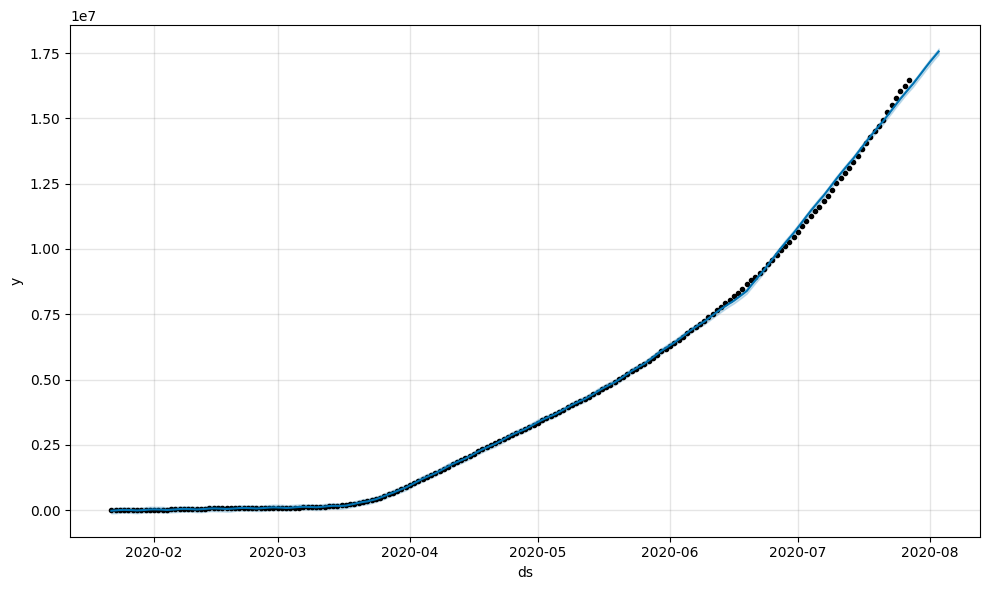

In [ ]:
model1.plot(forecasted)
plt.show()

In [ ]:
import plotly #Plotly is a powerful open-source graphing library that lets you create interactive, publication-quality charts and dashboards

In [ ]:
import plotly.express as ex

In [ ]:
world = df.groupby(['Country'])[['y','Deaths', 'Recovered', 'Active']].sum().reset_index()

In [ ]:
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'ds', 'y', 'Deaths', 'Recovered',
       'Active', 'WHO Region'],
      dtype='object')

In [ ]:
figure=ex.choropleth(world,locations='Country',locationmode='country names',color='Active',hover_name='Country',range_color=[1,100000],color_continuous_scale='reds',title='World map showing all the actives cases ')
figure.show()
plt.savefig('worldMap.png')

<Figure size 640x480 with 0 Axes>